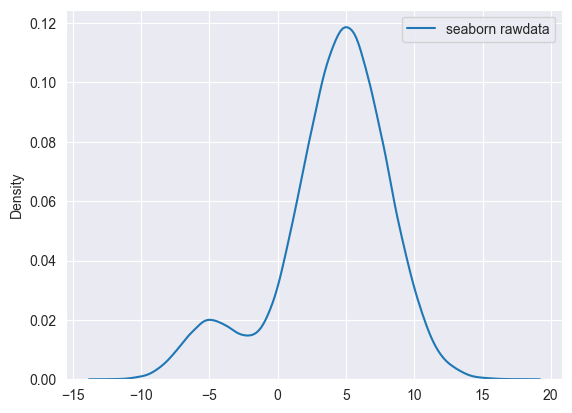

In [5]:
from numpy import ndarray
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.neighbors import KernelDensity

means = []
for x in range(0, 100):
    n = 100000
    dist_frac = 0.1
    x1 = np.random.normal(-5,2,int(n*dist_frac))
    x2 = np.random.normal(5,3,int(n*(1-dist_frac)))
    x = np.concatenate((x1,x2))
    mean = np.mean(x)
    means.append(mean)

means = np.array(means)
eval_points = np.linspace(np.min(means), np.max(means))

kde_sk = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde_sk.fit(means.reshape([-1,1]))
y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))

kde_sp = gaussian_kde(means, bw_method=1.0)
y_sp = kde_sp.pdf(eval_points)

sns.kdeplot(x)
plt.legend(['seaborn rawdata'])



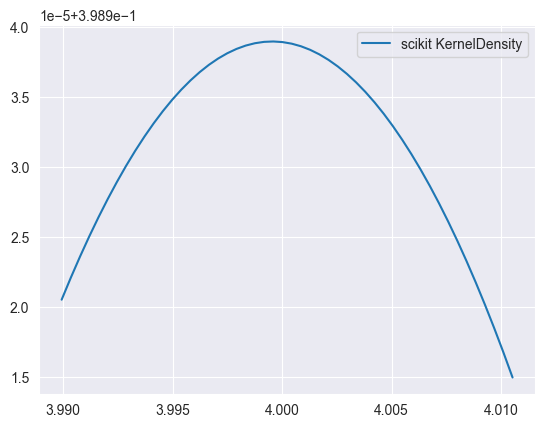

In [3]:
plt.plot(eval_points, y_sk)
plt.legend(['scikit KernelDensity'])


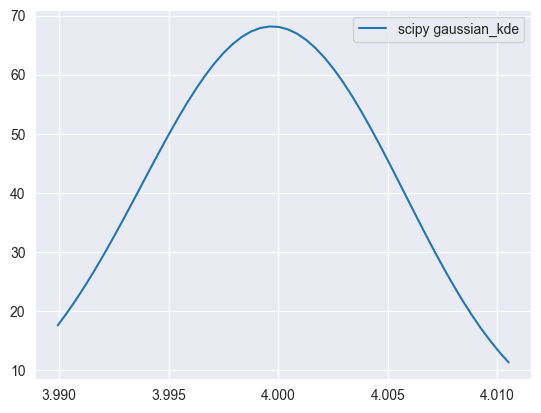

In [4]:
plt.plot(eval_points, y_sp)
plt.legend(['scipy gaussian_kde'])